In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns


In [2]:
from google.colab import files
data = files.upload()

Saving diabetes (2).csv to diabetes (2).csv


In [3]:
df = pd.read_csv("diabetes (2).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
res=df['BMI'].replace(to_replace=0, method='ffill',inplace=True)
print("Result:\n",res)
df['Glucose'].replace(to_replace=0,method='ffill',inplace=True)

Result:
 None


In [58]:
(df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [38]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [59]:
(df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


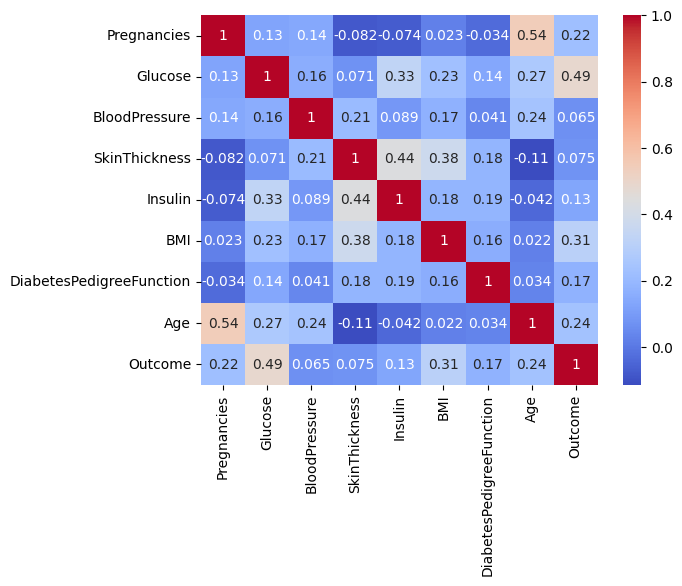

In [60]:
dfa = df.corr()
sns.heatmap(dfa,annot=True,cmap='coolwarm')
plt.show()

In [31]:
uni_vatriente = df.loc[df['Outcome']==True]
uni_vatriente

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


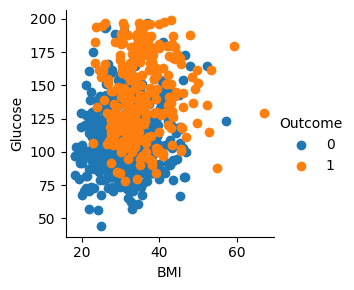

In [61]:
sns.FacetGrid(df,hue='Outcome').map(plt.scatter,'BMI','Glucose').add_legend();
plt.show()

In [62]:
X = df.iloc[:,[1,5,7]]
Y= df.iloc[:,[8]]
X

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33
...,...,...,...
763,101,32.9,63
764,122,36.8,27
765,121,26.2,30
766,126,30.1,47


In [103]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
x= preprocessing.scale(X)



In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.3,random_state=47)

In [10]:
#from sklearn.neighbors import KNeighborsClassifier
#model_x = KNeighborsClassifier(n_neighbors=7,p=3)
#model_x1 = model_x.fit(x_train,y_train)

In [11]:
#y_prd = model_x1.predict(x_test)
#y_prd

In [105]:
y_test

,Outcome
72,1
575,0
606,1
570,0
674,0
...,...
388,1
437,0
597,0
459,0


In [106]:
from sklearn.svm import SVC
model_xy = SVC()

In [107]:
model_xy.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [108]:
prediction = model_xy.predict([[148,23,25]])
prediction

array([0])

In [109]:
predict = model_xy.predict(x_test)

In [110]:
y_test

,Outcome
72,1
575,0
606,1
570,0
674,0
...,...
388,1
437,0
597,0
459,0


In [111]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score

In [112]:
confusion_matrix(y_test,predict)

array([[128,  23],
       [ 41,  39]])

In [113]:
recall_score(predict,y_test)

0.6290322580645161

In [114]:
precision_score(predict,y_test)

0.4875

In [115]:
accuracy_score(predict,y_test)

0.7229437229437229

In [116]:
f1_score(predict,y_test)

0.5492957746478874

In [117]:
model_xy.score(x_test,y_test)

0.7229437229437229